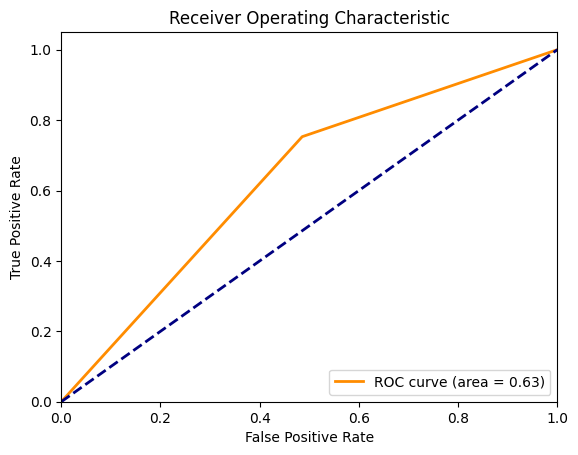

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np 

df = pd.read_csv('hi.csv')

df.drop('Loan_ID', axis=1, inplace=True)

# Fill missing values
for column in df.columns:
  if df[column].dtype == object:  # if column is categorical
    df[column] = df[column].fillna(df[column].mode()[0])
  else:  # if column is numeric
    df[column] = df[column].fillna(df[column].median())

label_encoders = {}

for column in df.select_dtypes(include=['object']).columns:
  label_encoders[column] = LabelEncoder()
  df[column] = label_encoders[column].fit_transform(df[column])

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train)

y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()